## Lab - Decision Trees

This is a multi part lab. In the first part, you will train a simple decision tree on a dataset. Next you will plot the decision boundary of the classifier and third you will output a decision tree diagram. 

You will use the Heart dataset to predict whether the patient has AHD or not.
The dataset contains information about various patient with heart conditions including their age, sex and other medical parameters.
Your task is to fit a DecisionTree model , and predict the value for AHD (yes or no) for the given data sample.
You will pick only two parameters - Max heart rate and age to predict AHD. 
Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv

"Some of the data in this lab are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 

In [1]:
# Importing pandas
import pandas as pd
import numpy as np 
heart = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv', na_values='?').dropna()
heart.info()
heart.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Part 1: training the Classifier
Start by training the decision tree classifier. This is similar to what we did in the main section. 

In [2]:
# get dataset  
data_set = heart[["Age","MaxHR","AHD"]]

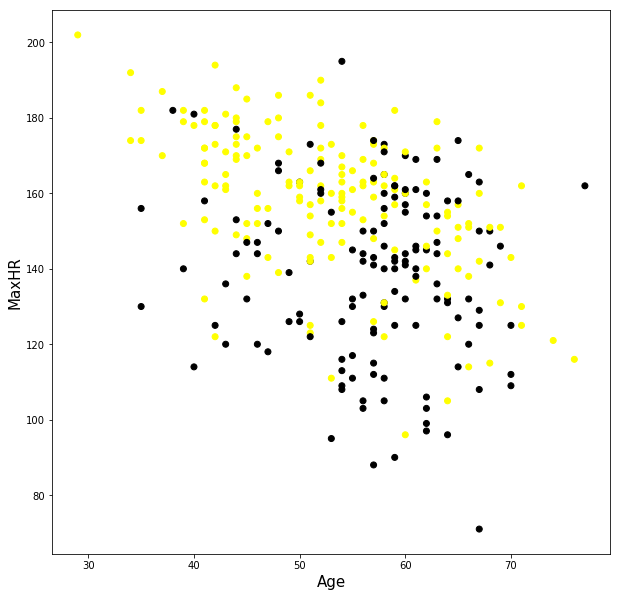

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import LabelEncoder


labels = LabelEncoder().fit_transform(data_set["AHD"].values) 
colors = ['yellow','black']
cmap= ListedColormap(colors)
plt.figure(figsize=(10,10))
plt.xlabel('Age', fontsize=15)
plt.ylabel('MaxHR', fontsize=15)
plt.scatter(data_set['Age'].values, data_set['MaxHR'].values, c=labels, cmap=cmap )


<img src='../../../images/age_vs_hr.png'><img>

In [4]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 

X = data_set[['Age','MaxHR']].values
y = labels.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print("y value min and max are : {},{}".format(min(y),max(y)))

y value min and max are : 0,1


y min and max are :0,1

In [5]:
tr_clf = tree.DecisionTreeClassifier(random_state=12, max_depth=2)
y_pred = tr_clf.fit(X_train, y_train.ravel()).predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("accuracy of the classifier on the test set {}".format(acc))

accuracy of the classifier on the test set 0.7333333333333333


accuracy of the classifier on the test set 0.7333333333333333


## Part 2: Plotting the decision surface
This part can be a tricky. The goal of this section is to plot the decision surface. To this do this you need to use the meshgrid function. We have written a simple function that converts 1d array points and converts them to 2d array so that you can use them to visualize. 

The idea is the generate 2d points using the function ```python to_3d(x,y,plot_step)``` then use then run prediction on these 2d points and plot them as a contour graph. This is done using the function ```python plot_contour(xx,yy,Z)``` Note that Z must be the same size as xx and yy for this to work. This is essentially a 3d plot since you have x and y dimensions as the variables and Z as the predicted the value. We are converting the Z dimension to a label and plotting it as a color map rather than projecting it into the 3rd dimension. 

These sort of plots help visualizes the regions which region each class represents. 

In [6]:

def to_3d(x,y,plot_step=0.01): 
   

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    return xx, yy 

def plot_contour(xx,yy,Z): 
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    return cs


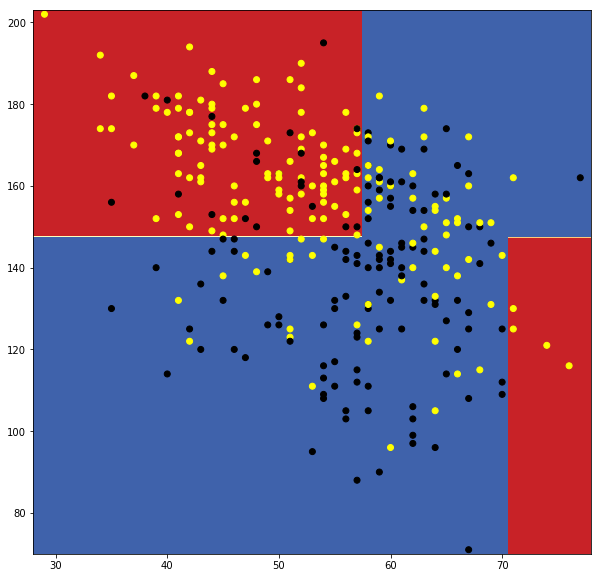

In [7]:

xx, yy = to_3d(X,y)

Z = tr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
cmap= ListedColormap(colors)

_ = plot_contour(xx,yy, Z)
plt.scatter(data_set["Age"].values, data_set["MaxHR"].values, c=labels,cmap=cmap )
plt.show()

<img src='../../../images/label_map_dt.png'>

In [8]:
print("Z should be {}".format(Z.shape))

Z should be (13300, 5000)


Z should be (13300, 5000)


In [9]:
def visualize_tree(sktree, features, classes, impurity = False, label = 'all', proportion = True):
    dot_data=StringIO()
    tree.export_graphviz(sktree
                         , feature_names=features
                         , class_names=classes
                         , filled=True
                         , rounded=True
                         , impurity = impurity
                         , label = label
                         , special_characters=True
                         , proportion = proportion
                         , out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    #  graph.write_pdf("tree.pdf") # Save to your current folder
    return(Image(graph.create_png()))


/home/pawan/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


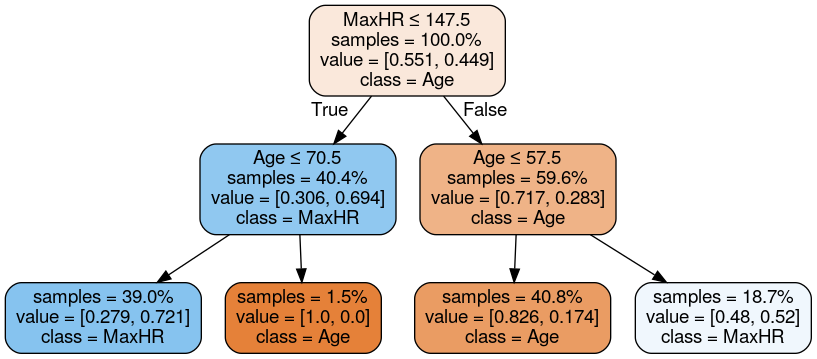

In [10]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

classes = ["Age","MaxHR"]
features = ["Age","MaxHR"]
visualize_tree(tr_clf, features, classes)

<img src='../../../images/dt_diagram.png'><img>